<a href="https://colab.research.google.com/github/harinadhkreddy/Data-Sciences/blob/main/Mnist_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
#import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

In [ ]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label='Validation Loss')
    ax.plot(x, ty, 'r', label='Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label='Validation Loss')
    ax.plot(x, ty, 'r', label='Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1],X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1],X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [ ]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [ ]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print("Class label of frist image: ",y_train[0])

Y_train = utils.to_categorical(y_train,10)
Y_test = utils.to_categorical(y_test,10)

print("After converting the output into a vector :",Y_train[0])

Class label of frist image:  5
After converting the output into a vector : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Softmax Classifier

### 1.Relu Adam 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128
nb_epoch = 20

In [ ]:
model_relu2  = Sequential()
model_relu2.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu2.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0125, seed=None)))
model_relu2.add(Dense(output_dim, activation='softmax'))

print(model_relu2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_18 (Dense)             (None, 52)                18980     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_relu2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train , Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3041 - accuracy: 0.9145 - val_loss: 0.1428 - val_accuracy: 0.9590
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1140 - accuracy: 0.9659 - val_loss: 0.0966 - val_accuracy: 0.9707
Epoch 3/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.0824 - val_accuracy: 0.9757
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0719 - val_accuracy: 0.9773
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0715 - val_accuracy: 0.9774
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0815 - val_accuracy: 0.9758
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0731 - val_accuracy: 0.9786
Epoch 

Test Score: 0.11015333235263824
Test accuracy: 0.9790999889373779


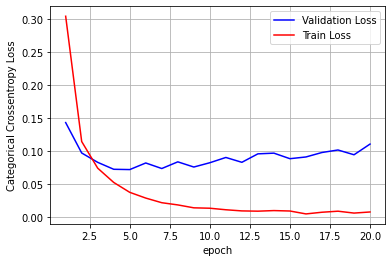

In [ ]:
score = model_relu2.evaluate(X_test, Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x , vy, ty, ax)

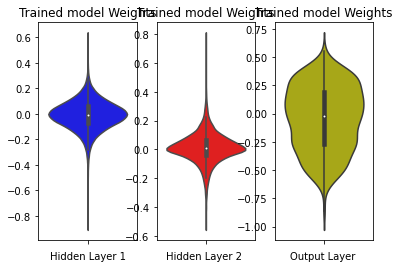

In [ ]:
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2. 3 layer


In [ ]:
model_relu3  = Sequential()
model_relu3.add(Dense(484, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu3.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0125, seed=None)))
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0295, seed=None)))
model_relu3.add(Dense(output_dim, activation='softmax'))

print(model_relu3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 484)               379940    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               124160    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 530,810
Trainable params: 530,810
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train , Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.2728 - accuracy: 0.9200 - val_loss: 0.1237 - val_accuracy: 0.9615
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0944 - accuracy: 0.9705 - val_loss: 0.0931 - val_accuracy: 0.9712
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0804 - val_accuracy: 0.9753
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0777 - val_accuracy: 0.9768
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0803 - val_accuracy: 0.9774
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0763 - val_accuracy: 0.9790
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0782 - val_accuracy: 0.9796

Test Score: 0.0958491787314415
Test accuracy: 0.9812999963760376


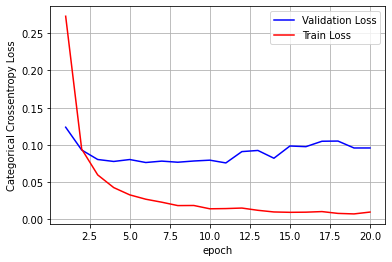

In [ ]:
score = model_relu3.evaluate(X_test, Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x , vy, ty, ax)

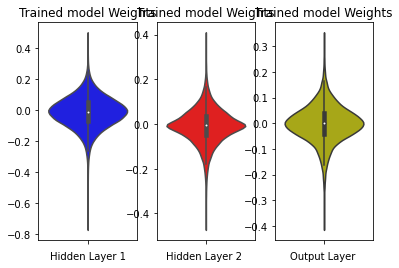

In [ ]:
w_after = model_relu3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [ ]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train , Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.1955 - accuracy: 0.9427 - val_loss: 0.1201 - val_accuracy: 0.9648
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.0827 - val_accuracy: 0.9740
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0944 - val_accuracy: 0.9699
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0964 - val_accuracy: 0.9711
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0828 - val_accuracy: 0.9773
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0799 - val_accuracy: 0.9776

Test Score: 0.08154969662427902
Test accuracy: 0.9789000153541565


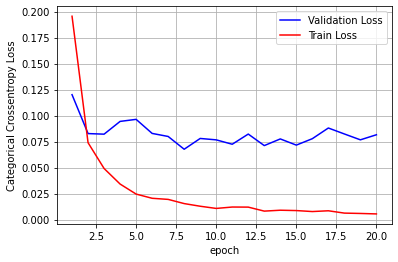

In [ ]:
score = model_batch.evaluate(X_test, Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x , vy, ty, ax)

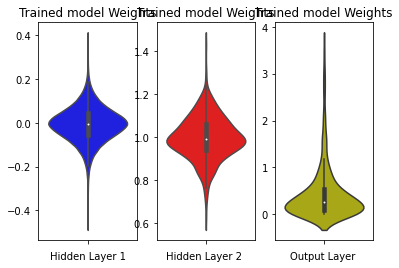

In [ ]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### drop out

In [ ]:
from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)               

In [ ]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train , Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.6737 - accuracy: 0.7928 - val_loss: 0.2940 - val_accuracy: 0.9134
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4294 - accuracy: 0.8694 - val_loss: 0.2567 - val_accuracy: 0.9265
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3823 - accuracy: 0.8847 - val_loss: 0.2388 - val_accuracy: 0.9322
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3581 - accuracy: 0.8913 - val_loss: 0.2263 - val_accuracy: 0.9342
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3378 - accuracy: 0.8986 - val_loss: 0.2113 - val_accuracy: 0.9378
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3219 - accuracy: 0.9019 - val_loss: 0.2024 - val_accuracy: 0.9415
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3066 - accuracy: 0.9083 - val_loss: 0.1963 - val_accuracy: 0.9411

Test Score: 0.10617617517709732
Test accuracy: 0.9688000082969666


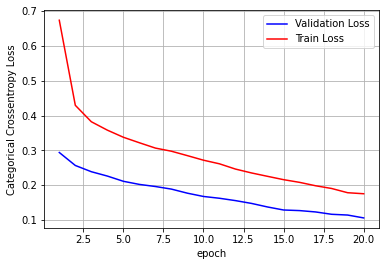

In [ ]:
score = model_drop.evaluate(X_test, Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x , vy, ty, ax)

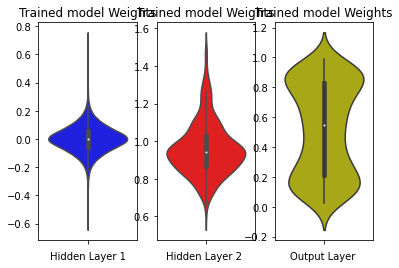

In [ ]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [ ]:
#from tensorflow.keras.layers import Dropout

model_dropr = Sequential()

model_dropr.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_dropr.add(BatchNormalization())
model_dropr.add(Dropout(0.5))

model_dropr.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_dropr.add(BatchNormalization())
model_dropr.add(Dropout(0.5))

model_dropr.add(Dense(output_dim, activation='softmax'))


model_dropr.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

In [ ]:
model_dropr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_dropr.fit(X_train , Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 0.4745 - accuracy: 0.8557 - val_loss: 0.1685 - val_accuracy: 0.9498
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2532 - accuracy: 0.9250 - val_loss: 0.1276 - val_accuracy: 0.9590
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2015 - accuracy: 0.9387 - val_loss: 0.1076 - val_accuracy: 0.9664
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1749 - accuracy: 0.9468 - val_loss: 0.0961 - val_accuracy: 0.9695
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1583 - accuracy: 0.9521 - val_loss: 0.0910 - val_accuracy: 0.9720
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1453 - accuracy: 0.9560 - val_loss: 0.0869 - val_accuracy: 0.9734
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1353 - accuracy: 0.9585 - val_loss: 0.0844 - val_accuracy: 0.9748

Test Score: 0.05857182666659355
Test accuracy: 0.983299970626831


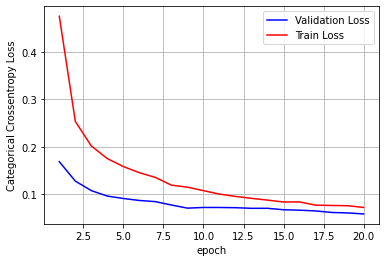

In [ ]:
score = model_dropr.evaluate(X_test, Y_test, verbose=0)
print('Test Score:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch'); ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x , vy, ty, ax)

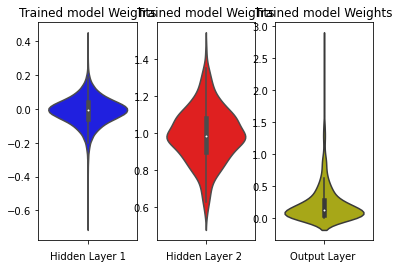

In [ ]:
w_after = model_dropr.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977667 using {'activ': 'sigmoid'}
0.977667 (0.002043) with: {'activ': 'sigmoid'}
0.977400 (0.000862) with: {'activ': 'relu'}
